In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.sparse.linalg as ll
import pandas as pd

# Q1.5

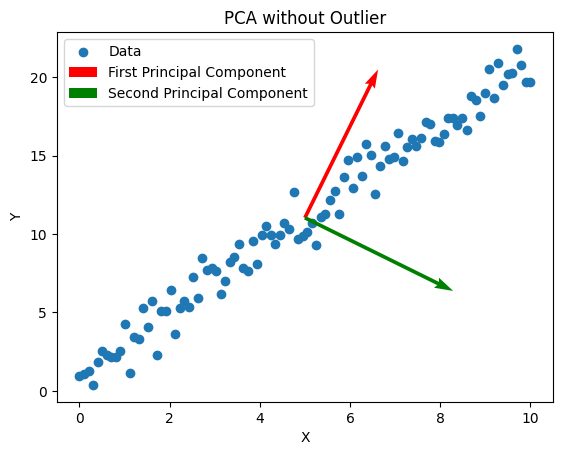

Explained Variance Ratio: [0.99582275 0.00417725]


In [76]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Generate data points following a linear trend
num_points = 100
x = np.linspace(0, 10, num_points)  # Generate x values from 0 to 10
slope = 2.0  # Slope of the line
intercept = 1.0  # Y-intercept of the line
noise_stddev = 1.0  # Standard deviation of noise added to data points

# Generate y values with some noise
y = slope * x + intercept + np.random.normal(0, noise_stddev, num_points)
data = np.column_stack((x, y))

#data_outlier = np.array([0, 80]).reshape(1, -1)
#data = np.vstack((data, data_outlier))


# Perform PCA
pca = PCA(n_components=2)
pca.fit(data)

# Plot the data and PCA results
plt.scatter(data[:, 0], data[:, 1], label='Data')
plt.quiver(*pca.mean_, *pca.components_[0], scale=3, label='First Principal Component', color='red')
plt.quiver(*pca.mean_, *pca.components_[1], scale=3, label='Second Principal Component', color='green')
plt.title("PCA without Outlier")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

# Explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


# 2. PCA: Food Consumption in European Countries

## 2.1

In [28]:
dat = pd.read_csv("data/food-consumption.csv")

atr = dat.iloc[:,1:21]
country = dat.iloc[:,0]
m,n = atr.shape


In [3]:
mu = np.array(np.mean(atr,axis = 1))
xc = atr - mu[:,None]
C = np.dot(xc,xc.T)/m
K = 2
S,W = ll.eigs(C,k = K)
S = S.real
W = W.real

dim1 = np.dot(W[:,0].T,xc)/math.sqrt(S[0]) # extract 1st S
dim2 = np.dot(W[:,1].T,xc)/math.sqrt(S[1]) # extract 2nd eigenvalue


sorted_indices = np.argsort(S)[::-1]
S = S[sorted_indices]
W = W[:, sorted_indices]


(16, 20)
16


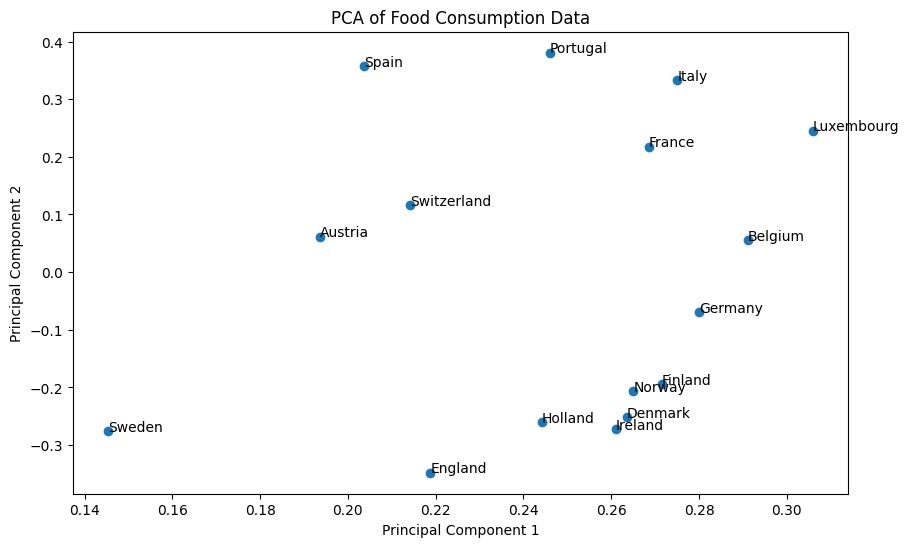

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(W[:, 0], W[:, 1])

for i, country1 in enumerate(country):
    plt.annotate(country1, (W[i, 0], W[i, 1]))


plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Food Consumption Data')
plt.show()

## 2.2

In [29]:
dat = pd.read_csv("data/food-consumption.csv")
dat = dat.T.reset_index()
country = dat.iloc[1:,1:21]
country = country.astype(float)
dat.columns = dat.iloc[0]
dat = dat[1:]
food = dat.iloc[:,0]
m,n = country.shape


In [7]:
mu = np.array(np.mean(country,axis = 1))

xc = country - mu[:,None]
xc = np.array(xc, dtype=object)

C = np.dot(xc,xc.T)/m
C = C.astype(float)

K = 2
S,W = ll.eigs(C,k = K)
S = S.real
W = W.real

dim1 = np.dot(W[:,0].T,xc)/math.sqrt(S[0]) # extract 1st S
dim2 = np.dot(W[:,1].T,xc)/math.sqrt(S[1]) # extract 2nd eigenvalue


sorted_indices = np.argsort(S)[::-1]
S = S[sorted_indices]
W = W[:, sorted_indices]

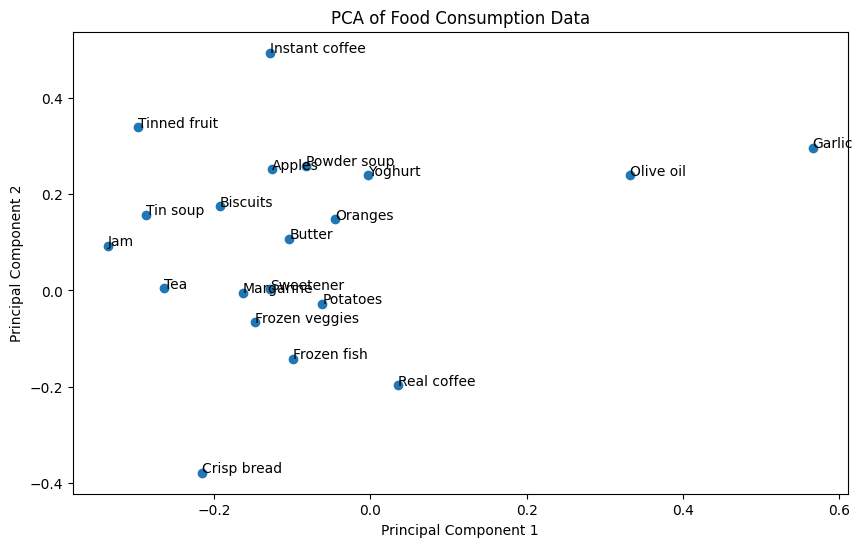

In [8]:

plt.figure(figsize=(10, 6))
plt.scatter(W[:, 0], W[:, 1])


for i, country1 in enumerate(food):
    plt.annotate(country1, (W[i, 0], W[i, 1]))


plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Food Consumption Data')
plt.show()

# 3. Order of faces using ISOMAP

In [80]:
from scipy.io import loadmat
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.sparse.csgraph import shortest_path
from scipy import linalg
import networkx as nx

data1 = loadmat('data/isomap.mat')
im = data1['images'].reshape(64,64,698).T
data = data1['images']


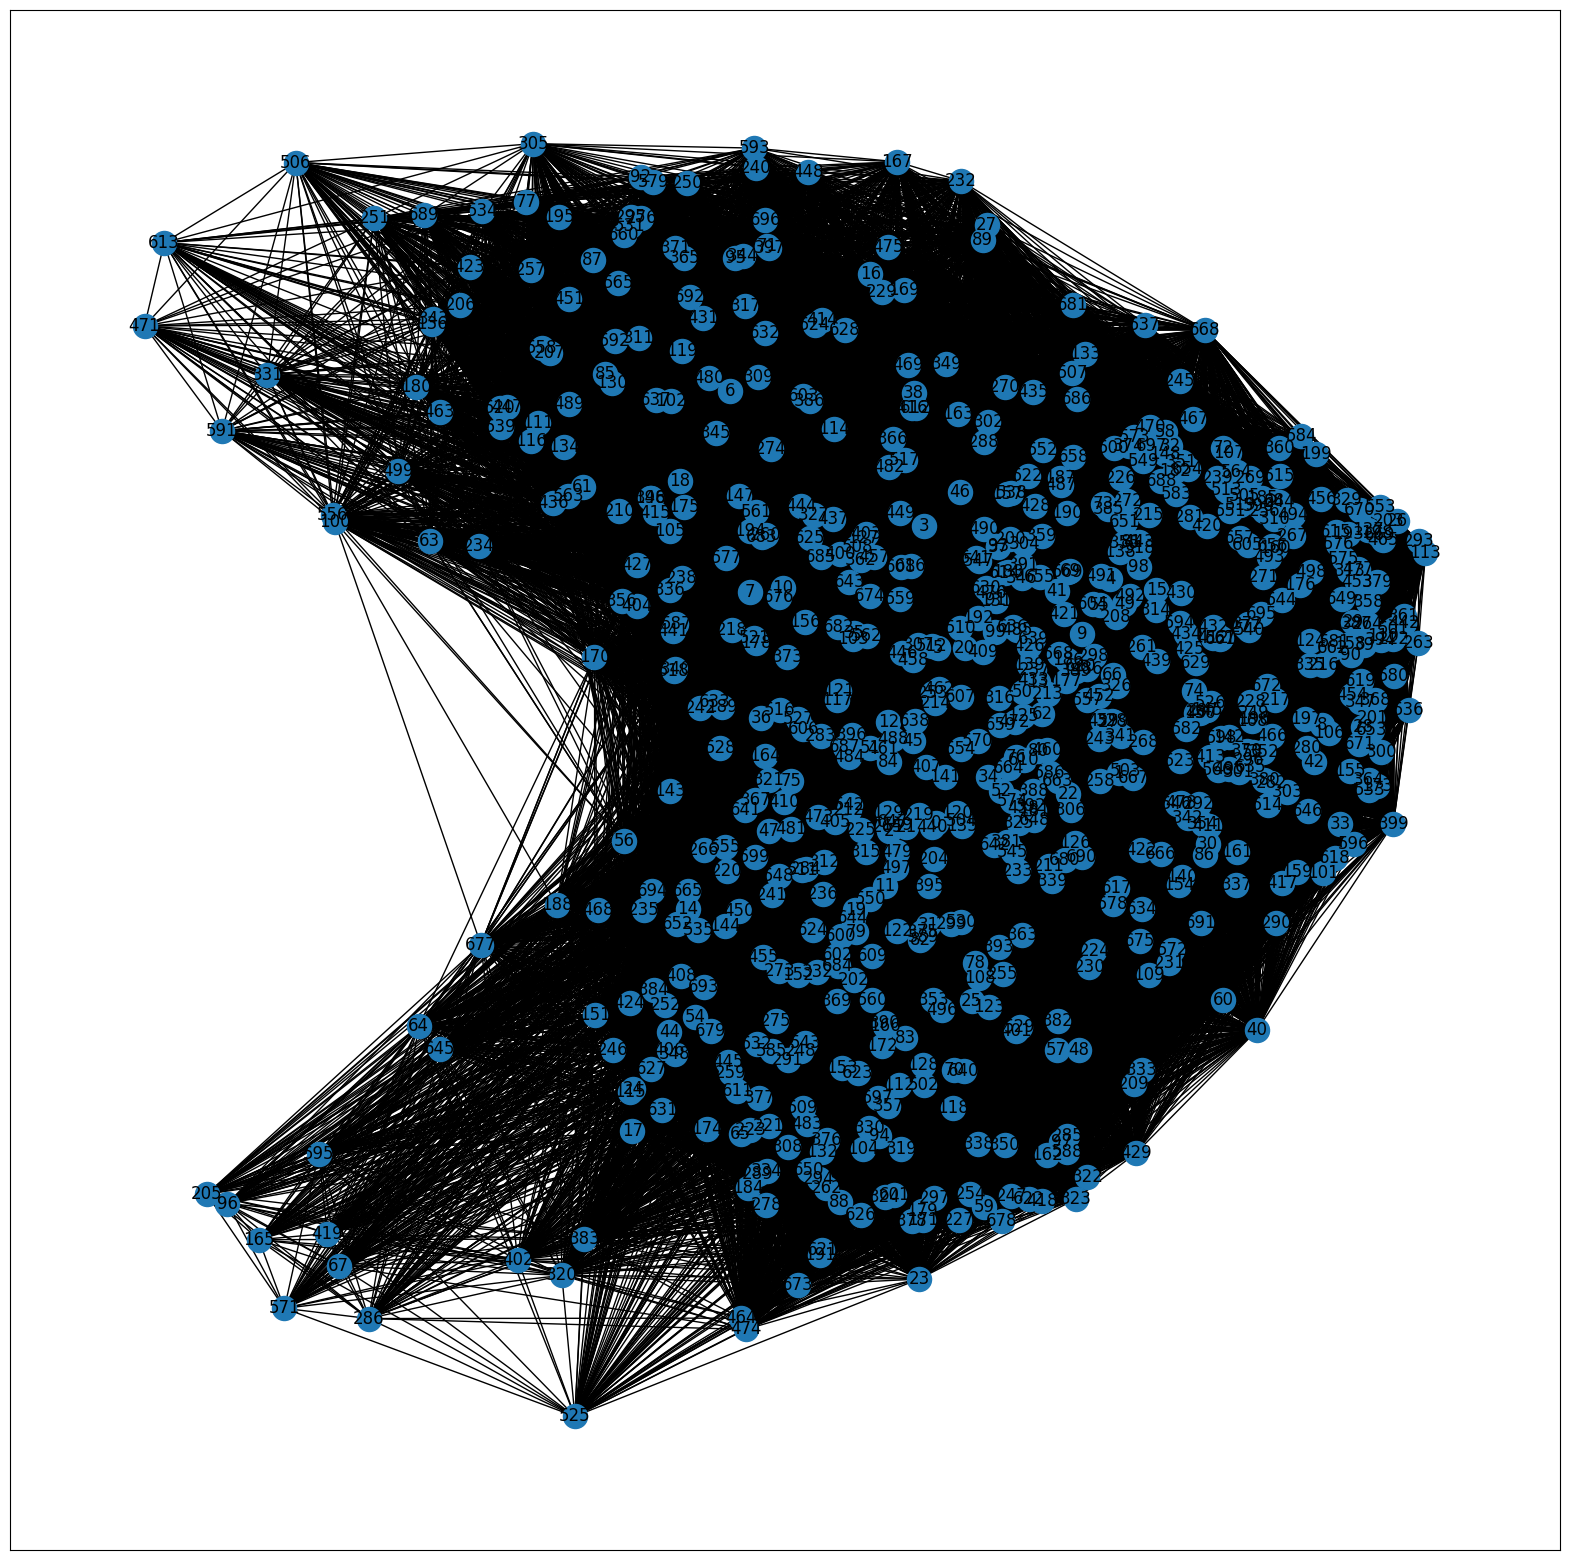

In [92]:
# https://www.askpython.com/python/examples/adjacency-matrix-python 

n= 698
k = 2
eps = 20
d = data.T

adjacency_matrix = np.zeros((n, n))
a = np.zeros((n, n))
di = np.zeros((n, n)) 
for i in range(n):
    for j in range(n):
        if i != j:
            dist = np.sqrt(np.sum((d[i] - d[j]) ** 2))
            if dist <= eps:
                adjacency_matrix[i,j] = dist
                a[i,j] = 1


def createGraph(adjM):
  edges=[]
  noofvertices=len(adjM)
  for mat in adjM:
    if len(mat)>noofvertices or len(mat)<noofvertices:
      print("False Adjacency Matrix")
      return 0
  for i in range(len(adjM)):
    mat=adjM[i]
    for j in range(len(mat)):
      if mat[j]==1:
        temp=[i,j]
        edges.append(temp)
  plt.figure(figsize=(20,20))
  G=nx.Graph()
  G.add_edges_from(edges)
  nx.draw_networkx(G)
  plt.show()
  vertices=[i for i in range(len(adjM))]
  #return vertices,edges
  return


createGraph(a)

In [85]:
# https://github.com/lwileczek/isomap/blob/master/README.md


# Make A and D matrix
eps = 12
n, m = data.shape
dist = cdist(data.T, data.T, metric="euclidean")
adj =  np.zeros((m, m)) + np.inf
rng = dist < eps
adj[rng] = dist[rng]
d = shortest_path(adj).real

# centering matrix H to get C
n, m = d.shape
h = np.eye(m) - (1/m)*np.ones((m, m))
d = d**2
c = -1/(2) * h.dot(d).dot(h)


# compute leading eignvecs and eignevals
evals, evecs = linalg.eig(c)
idx = evals.argsort()[::-1]
evals = evals[idx]
evecs = evecs[:, idx]
evals = evals[:2] 
evecs = evecs[:, :2]
z = -evecs.dot(np.diag(evals**(-1/2)))
z = z.real

Text(0.5, 0, 'Right-Left Pose')

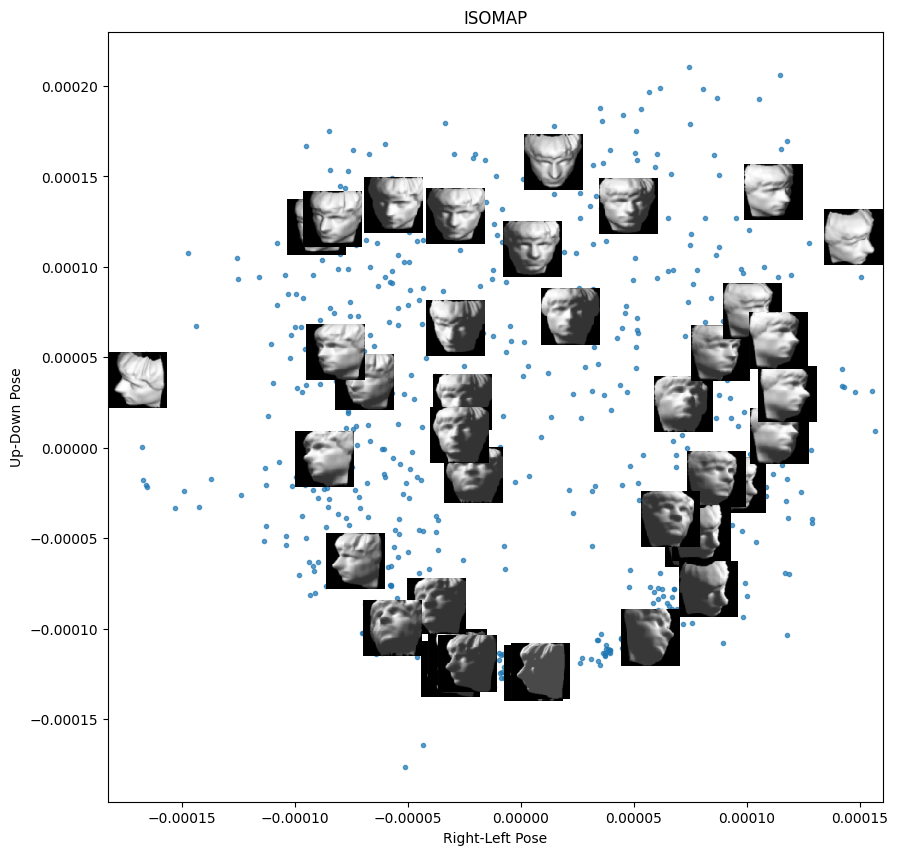

In [95]:
components = z
x_ = data.T
n, m = x_.shape
fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_title('ISOMAP')
ax.set_xlabel('Component: 1')
ax.set_ylabel('Component: 2')
# Show 40 of the images ont the plot
x_size = (max(components[:, 0]) - min(components[:, 0])) * 0.08
y_size = (max(components[:, 1]) - min(components[:, 1])) * 0.08
for i in range(40):
    img_num = np.random.randint(0, n)
    x0 = components[img_num, 0] - (x_size / 2.)
    y0 = components[img_num, 1] - (y_size / 2.)
    x1 = components[img_num, 0] + (x_size / 2.)
    y1 = components[img_num, 1] + (y_size / 2.)
    img = x_[img_num,:].reshape(64, 64).T
    ax.imshow(img, aspect='auto', cmap=plt.cm.gray, interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))
# Show 2D components plot
ax.scatter(components[:, 0], components[:, 1], marker='.',alpha=0.7)
ax.set_ylabel('Up-Down Pose')
ax.set_xlabel('Right-Left Pose')

In [96]:
mu = np.array(np.mean(data.T,axis = 1))

xc = data.T - mu[:,None]
xc = np.array(xc, dtype=object)
m = 698
C = np.dot(xc,xc.T)/m
C = C.astype(float)

K = 2
S,W = ll.eigs(C,k = K)
S = S.real
W = W.real

dim1 = np.dot(W[:,0].T,xc)/math.sqrt(S[0]) # extract 1st S
dim2 = np.dot(W[:,1].T,xc)/math.sqrt(S[1]) # extract 2nd eigenvalue

sorted_indices = np.argsort(S)[::-1]
S = S[sorted_indices]
W = -W[:, sorted_indices]

Text(0.5, 0, 'Right-Left Pose')

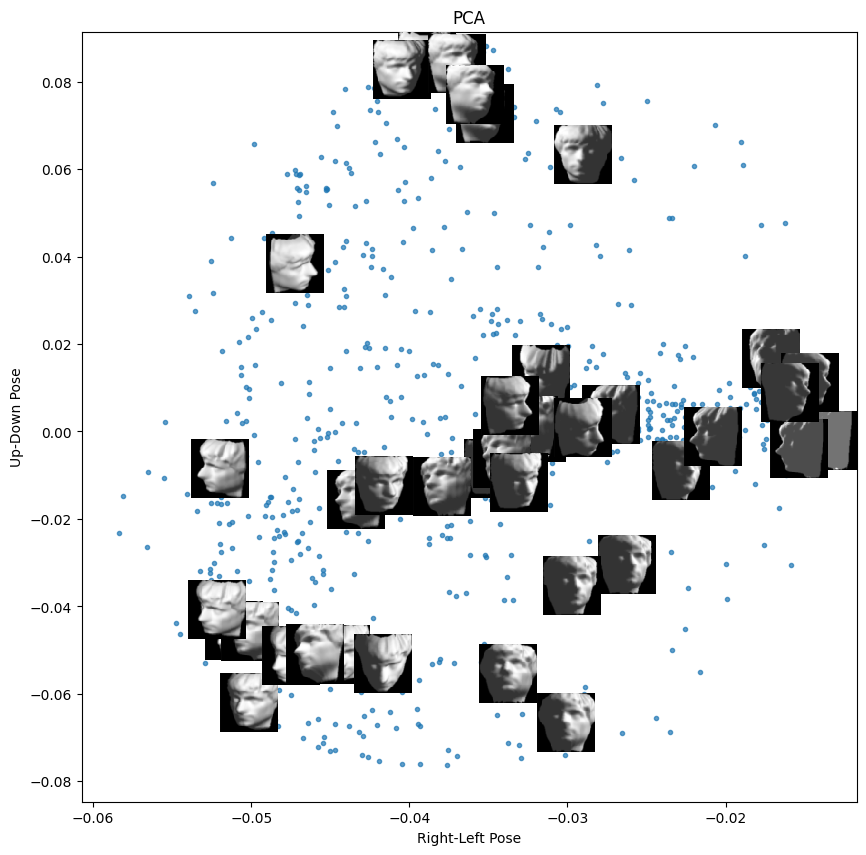

In [97]:
components = -W
x_ = data.T
n, m = x_.shape
fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_title('PCA')
ax.set_xlabel('Component: 1')
ax.set_ylabel('Component: 2')
# Show 40 of the images ont the plot
x_size = (max(components[:, 0]) - min(components[:, 0])) * 0.08
y_size = (max(components[:, 1]) - min(components[:, 1])) * 0.08
for i in range(40):
    img_num = np.random.randint(0, n)
    x0 = components[img_num, 0] - (x_size / 2.)
    y0 = components[img_num, 1] - (y_size / 2.)
    x1 = components[img_num, 0] + (x_size / 2.)
    y1 = components[img_num, 1] + (y_size / 2.)
    img = x_[img_num,:].reshape(64, 64).T
    ax.imshow(img, aspect='auto', cmap=plt.cm.gray, interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))
# Show 2D components plot
ax.scatter(components[:, 0], components[:, 1], marker='.',alpha=0.7)
ax.set_ylabel('Up-Down Pose')
ax.set_xlabel('Right-Left Pose')

# 4. Eigenfaces and simple face recognition

In [98]:
import glob
from PIL import Image
from scipy import ndimage
from sklearn.decomposition import PCA

# pull images 
images1 = [Image.open(file) for file in glob.glob("data/yalefaces/s1/*.gif")]
images2 = [Image.open(file) for file in glob.glob("data/yalefaces/s2/*.gif")]

# downsampling by factor of 4
im_og = np.empty([10, 243, 320])
s1 = np.empty([10,61,80])
for i in range(len(images1)):
    im_og[i] = np.array(images1[i])
    s1[i] = ndimage.interpolation.zoom(im_og[i],.25)

im_og = np.empty([9, 243, 320])
s2 = np.empty([9,61,80])
for i in range(len(images2)):
    im_og[i] = np.array(images2[i])
    s2[i] = ndimage.interpolation.zoom(im_og[i],.25)

# convert to data matrix (each row is vectorized image)
S1 = []
for i in range(len(s1)):
    s = s1[i].reshape(-1,4880) 
    S1.append(s)
    
S2 = []
for i in range(len(s2)):
    s = s2[i].reshape(-1,4880) 
    S2.append(s)

S1 =np.squeeze(S1)
S2 =np.squeeze(S2)


C:\Users\Patrick Gardocki\AppData\Local\Temp\ipykernel_5016\807143877.py:15: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  s1[i] = ndimage.interpolation.zoom(im_og[i],.25)
C:\Users\Patrick Gardocki\AppData\Local\Temp\ipykernel_5016\807143877.py:21: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  s2[i] = ndimage.interpolation.zoom(im_og[i],.25)


In [18]:
from sklearn.decomposition import PCA
# Perform PCA to get top 1 eignfaces
pca1 = PCA(n_components=1)
pca1.fit(S1)
ef1 = pca1.components_
ef1i = ef1.reshape(1,61,80)

pca2 = PCA(n_components=1)
pca2.fit(S2)
ef2 = pca2.components_
ef2i = ef2.reshape(1,61,80)


In [99]:
from sklearn.decomposition import PCA
# Perform PCA to get top 6 eignfaces
pca1 = PCA(n_components=6)
pca1.fit(S1)
ef1 = pca1.components_
ef1i = ef1.reshape(6,61,80)

pca2 = PCA(n_components=6)
pca2.fit(S2)
ef2 = pca2.components_
ef2i = ef2.reshape(6,61,80)


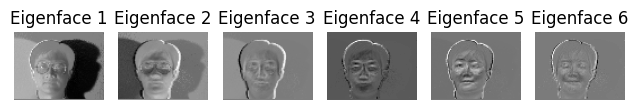

In [117]:

for i in range(6):
    fig.set_size_inches(20, 20)
    plt.subplot(3, 6, i + 1)  # 1 row, num_images columns
    plt.imshow(ef2i[i], cmap='gray')
    plt.title(f'Eigenface {i+1}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [21]:
# pull images 
test1 = [Image.open(file) for file in glob.glob("data/yalefaces/test/subject01-test.gif")]
test2 = [Image.open(file) for file in glob.glob("data/yalefaces/test/subject02-test.gif")]

# downsampling by factor of 4
im_og = np.empty([1, 243, 320])
s1 = np.empty([1,61,80])
for i in range(len(test1)):
    im_og[i] = np.array(test1[i])
    s1[i] = ndimage.interpolation.zoom(im_og[i],.25)

im_og = np.empty([1, 243, 320])
s2 = np.empty([1,61,80])
for i in range(len(test2)):
    im_og[i] = np.array(test2[i])
    s2[i] = ndimage.interpolation.zoom(im_og[i],.25)

# convert to data matrix (each row is vectorized image)
t1 = []
for i in range(len(s1)):
    s = s1[i].reshape(-1,4880) 
    t1.append(s)
    
t2 = []
for i in range(len(s2)):
    s = s2[i].reshape(-1,4880) 
    t2.append(s)

t1 = t1[0]
t2 = t2[0]


C:\Users\Patrick Gardocki\AppData\Local\Temp\ipykernel_5016\3788355382.py:10: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  s1[i] = ndimage.interpolation.zoom(im_og[i],.25)
C:\Users\Patrick Gardocki\AppData\Local\Temp\ipykernel_5016\3788355382.py:16: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  s2[i] = ndimage.interpolation.zoom(im_og[i],.25)


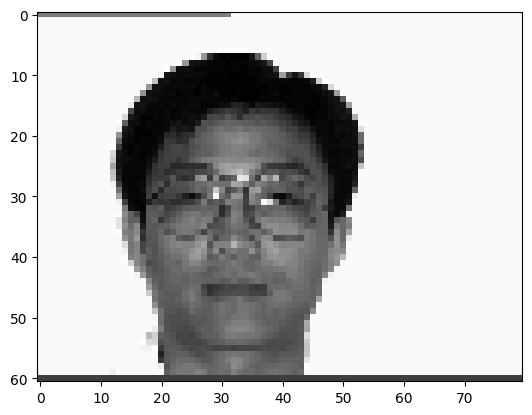

In [144]:
plt.imshow(t2.reshape(61,80),cmap='gray')

In [136]:
#ef1 = ef1[0].reshape(4880,1)
#ef2 = ef2[0].reshape(4880,1)
pr11 = np.linalg.norm(t1 - np.dot(ef1.T,np.dot(ef1,t1)))
pr21 = np.linalg.norm(t1 - np.dot(ef2.T,np.dot(ef2,t1)))
pr12 = np.linalg.norm(t2 - np.dot(ef1.T,np.dot(ef1,t2)))
pr22 = np.linalg.norm(t2 - np.dot(ef2.T,np.dot(ef2,t2)))

print("Projection Residual for Subject 1 compared to Eigneface 1:", pr11)
print("Projection Residual for Subject 2 compared to Eigneface 1:", pr12)
print("Projection Residual for Subject 1 compared to Eigneface 2:", pr21)
print("Projection Residual for Subject 2 compared to Eigneface 2:", pr22)



Projection Residual for Subject 1 compared to Eigneface 1: 2.5559766223623975e-11
Projection Residual for Subject 2 compared to Eigneface 1: 2.8910821598437604e-11
Projection Residual for Subject 1 compared to Eigneface 2: 1.3831968878062028e-11
Projection Residual for Subject 2 compared to Eigneface 2: 1.5186675835002098e-11
